# DS ML Coding Challenge

#### Name: Parth Singh
#### PRN: 21070126062

## Methodology and Approach

#### 1. Importing libraries and loading the dataset

#### 2. Looking up for basic info and datatypes of the dataset

#### 3. Visualising the distribution of categrorial variables in the dataset.

#### 4. Exploring the numerical variables; understanding the skewness and thus to identify and remove outliers.

#### 5. Dropping uncessary columns of the dataset.

#### 6. Visualising the mean and median of sourcing cost w.r.t the categorical variables.

#### 7. Understanding Source Costing Range within Categorical Columns

#### 7. Label Encoding the Categorical Variables

#### 8. Plotting the correlation matrix

#### 9. Pointing out key insights from preprocessing and EDA.

#### 10. Creating train and val set for model training.

#### 11. Training Approach 1: 
* Simple application of regression models on the data:
* Models: Linear Regression Model, Ridge Regression Model, Lasso Regression Model, Elastic Net Model, Random Forest Regressor, Gradient Boosting Regressor

#### 12. Training Approach 2:
* Applying hyperparameter tunning to the highest perfroming models of Training Approach I.
* Models: Random Forest Regressor, Gradient Boosting Regressor

#### 13. Training Approach 3: 
* Appying PCA to dataset and then training model
* Models: Models: Random Forest Regressor, Gradient Boosting Regressor

#### 14. Visualising the best model on test data

#### 15. Conclusion and Result

#### 16. Saving the model as pkl file

# Importing Libraries

In [127]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, cross_val_score
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [97]:
#Loading the excel workbook
dataset_file = '/kaggle/input/ds-ml-dataset/DS_ML Coding Challenge Dataset (1).xlsx'
dataset = pd.ExcelFile(dataset_file)

# Geting the list of sheet names
sheet_names = dataset.sheet_names

#Print the list of sheets in the workbook
print(sheet_names)

['Instructions', 'Training Dataset', 'Test Dataset']


In [98]:
#Loading the train dataframe
train_df=pd.read_excel(dataset_file, sheet_name='Training Dataset')
test_df=pd.read_excel(dataset_file, sheet_name='Test Dataset')

In [99]:
train_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763


In [100]:
test_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42


# Exploratory Data Analysis of Train Datarame

## Checking data type and basic info

In [101]:
# Shape of dataset
train_df.shape

(550176, 8)

In [102]:
# Number of unique values in the columns
train_df.nunique()

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        6747
dtype: int64

In [103]:
# Basic info of dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


In [104]:
# Describing numerical properties of dataset
train_df.describe()

,Month of Sourcing,Sourcing Cost
count,550176,550176.000000
mean,2020-12-08 10:27:28.769848576,108.816793
min,2020-07-01 00:00:00,-196.070000
25%,2020-10-01 00:00:00,57.000000
50%,2020-12-01 00:00:00,132.000000
75%,2021-03-01 00:00:00,146.147000
max,2021-05-01 00:00:00,32632.500000
std,NaN,104.390097


## Checking for missing values

In [105]:
#printing for null values
null_counts = train_df.isnull().sum()
print(null_counts)

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


## Exploring categorical variables

In [106]:
#Identifying the categorical columns in the dataset
categorical_columns = train_df.select_dtypes(include=['object', 'category','datetime64']).columns.tolist()
print(categorical_columns)

['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']


## Visualising the distribution of categorical variables

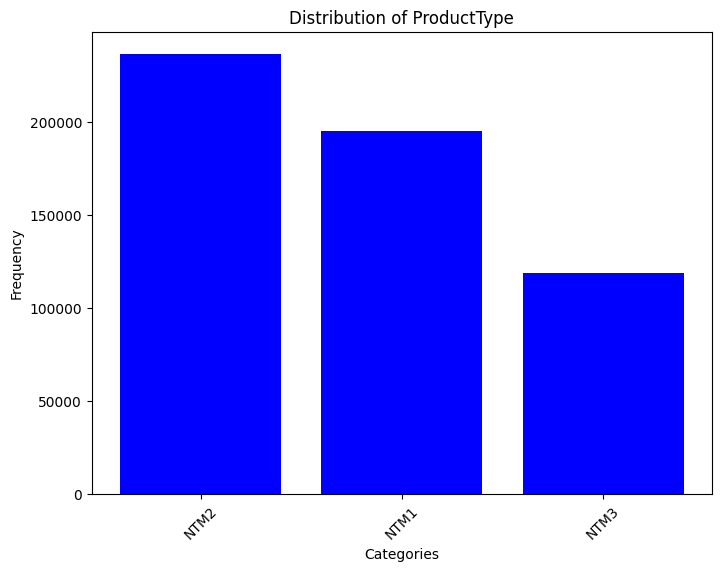

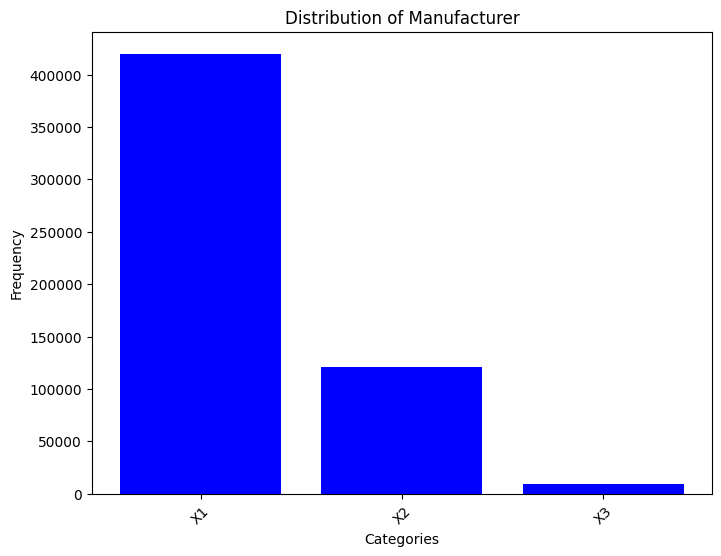

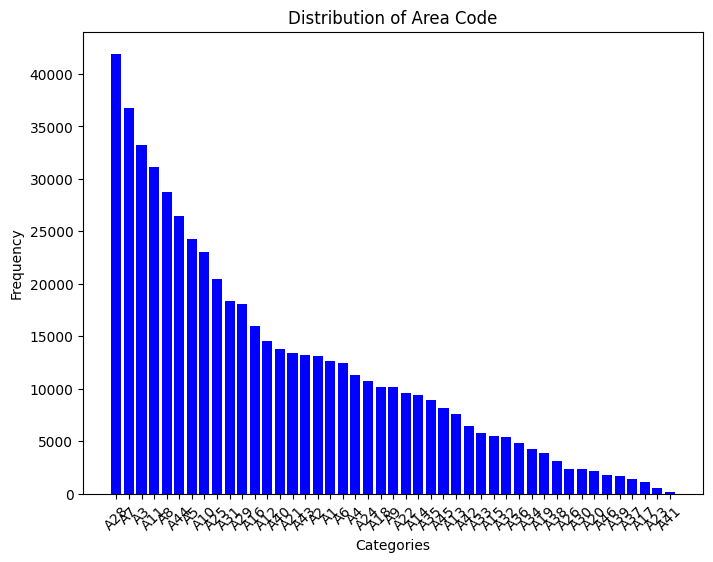

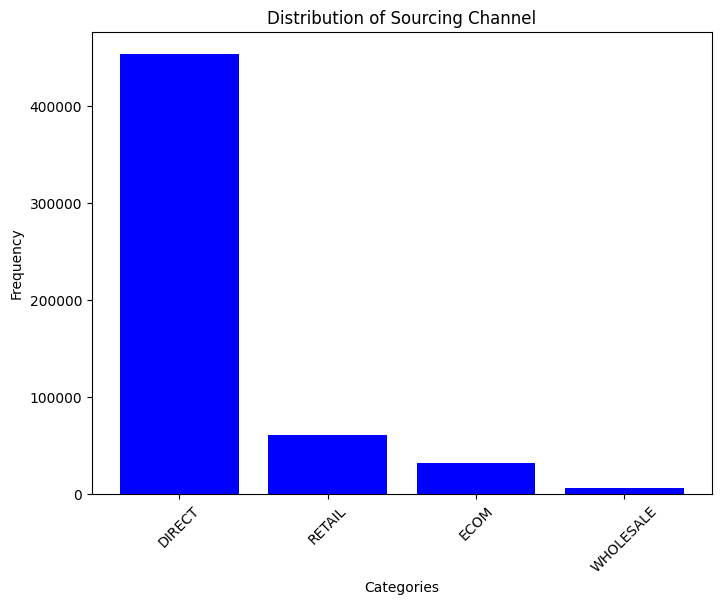

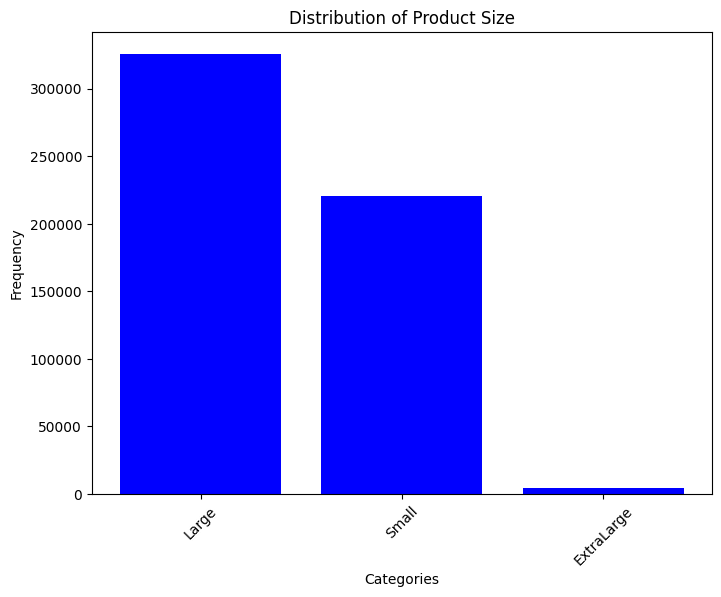

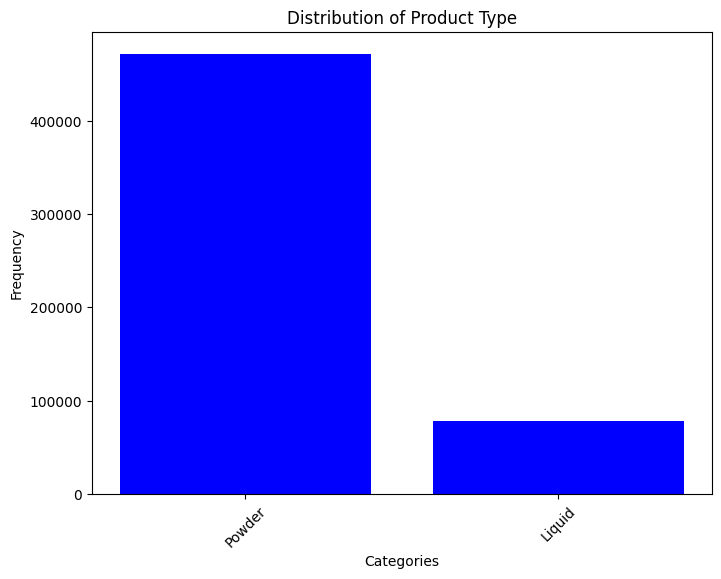

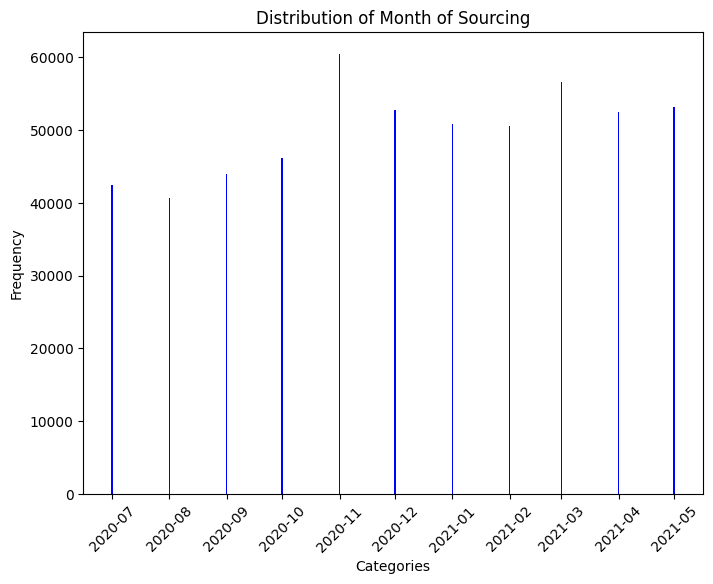

In [107]:
for column in categorical_columns:
    # Calculate value counts for each category
    value_counts = train_df[column].value_counts()

    # Create a bar plot using matplotlib
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values, color='blue')

    # Set plot title and axis labels
    plt.title(f'Distribution of {column}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Show the plot
    plt.show()

## Exploring numerical columns of the dataset

In [108]:
# Understanding basic description of 'Sourcing Cost'
train_df['Sourcing Cost'].describe()

count    550176.000000
mean        108.816793
std         104.390097
min        -196.070000
25%          57.000000
50%         132.000000
75%         146.147000
max       32632.500000
Name: Sourcing Cost, dtype: float64

In [109]:
# Checking the number of positives, negatives and zero values 
print('Negative Values or Zero Values: ',len(train_df[train_df['Sourcing Cost'] <= 0]))
print('Positive Values: ',len(train_df[train_df['Sourcing Cost'] > 0]))

Negative Values or Zero Values:  12315
Positive Values:  537861


## Supposingly, sourcing cost can not be a negative or zero value, so it is better to remove them

In [110]:
train_df = train_df[train_df['Sourcing Cost'] > 0]
print('Negative Values or Zero Values: ',len(train_df[train_df['Sourcing Cost'] <= 0]))
print('Positive Values: ',len(train_df[train_df['Sourcing Cost'] > 0]))

Negative Values or Zero Values:  0
Positive Values:  537861


## Visualising the skewness of the dataset

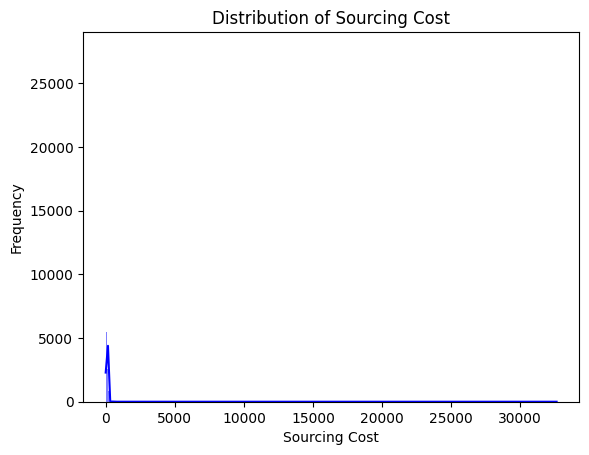

Skewness: 135.47388660836057


In [111]:
sns.histplot(train_df['Sourcing Cost'], kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
skewness = stats.skew(train_df['Sourcing Cost'])

print("Skewness:", skewness)

## As the data is highly skewed, oultiers need to be removed to make the dataset a normal distribution. 
### Reason: Skewness can affect the performance of the algorithm by introducing bias or making them less robust. Skewness close to zero displays a normal distribution.

## Identifying and removing the outliers of the dataset

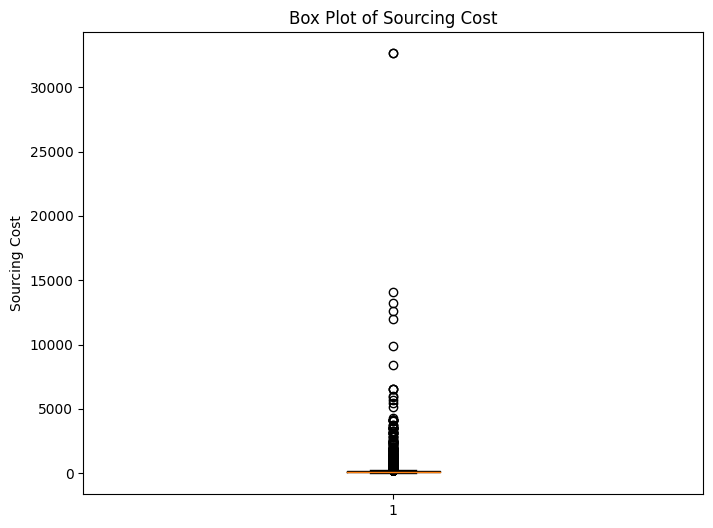

In [112]:
plt.figure(figsize=(8, 6))
plt.boxplot(train_df['Sourcing Cost'])
plt.title('Box Plot of Sourcing Cost')
plt.ylabel('Sourcing Cost')

# Show plot
plt.show()

## Using z-score to identify the outliers and remove them

### Reason: Z-score is a statistical measure that indicates how many standard deviations a data point is from the mean of a dataset. It's commonly used to identify and remove outliers because it provides a standardized way to measure the deviation of individual data points from the mean, regardless of the original scale of the data.

In [113]:
z_scores = np.abs(stats.zscore(train_df['Sourcing Cost']))
threshold = 1
outliers = train_df['Sourcing Cost'][z_scores > threshold]
print("Outliers:", len(outliers))

Outliers: 28168


In [114]:
outliers_index = (z_scores > threshold)
train_df = train_df[~outliers_index]
train_df.shape

(509693, 8)

## Visualising the skewness after removing outliers

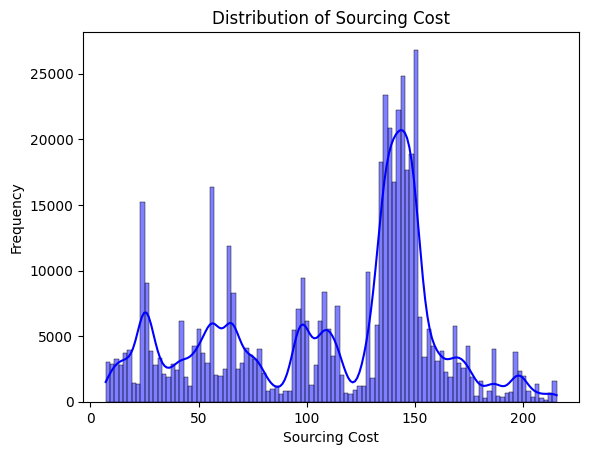

Skewness: -0.4714208707043304


In [115]:
sns.histplot(train_df['Sourcing Cost'], kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
skewness = stats.skew(train_df['Sourcing Cost'])

print("Skewness:", skewness)

## Dropping unnecessary columns

In [116]:
train_df.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

## Currently, we are removing Area Code and Month of Sourcing

In [117]:
columns_to_drop = ['Area Code', 'Month of Sourcing']
train_df.drop(columns=columns_to_drop, inplace=True)

In [118]:
train_df.columns

Index(['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size',
       'Product Type', 'Sourcing Cost'],
      dtype='object')

## Visualising the mean and median of categorical variables with sourcing cost

In [119]:
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
for column in categorical_columns:
    grouped_data = train_df.groupby(column)['Sourcing Cost'].agg(['mean', 'median']).reset_index()

    fig = go.Figure()

    # Plot mean values
    fig.add_trace(go.Bar(x=grouped_data[column], y=grouped_data['mean'], name='Mean'))

    # Plot median values
    fig.add_trace(go.Bar(x=grouped_data[column], y=grouped_data['median'], name='Median'))

    # Add mean annotations
    for i, mean_value in enumerate(grouped_data['mean']):
        fig.add_annotation(x=grouped_data[column][i], y=mean_value)

    # Add median annotations
    for i, median_value in enumerate(grouped_data['median']):
        fig.add_annotation(x=grouped_data[column][i], y=median_value)

    fig.update_layout(title=f'Mean and Median Values by {column}',
                      xaxis_title=column,
                      yaxis_title='Value')
    fig.show()

## Understanding Souring Cost Range with Categorical Columns

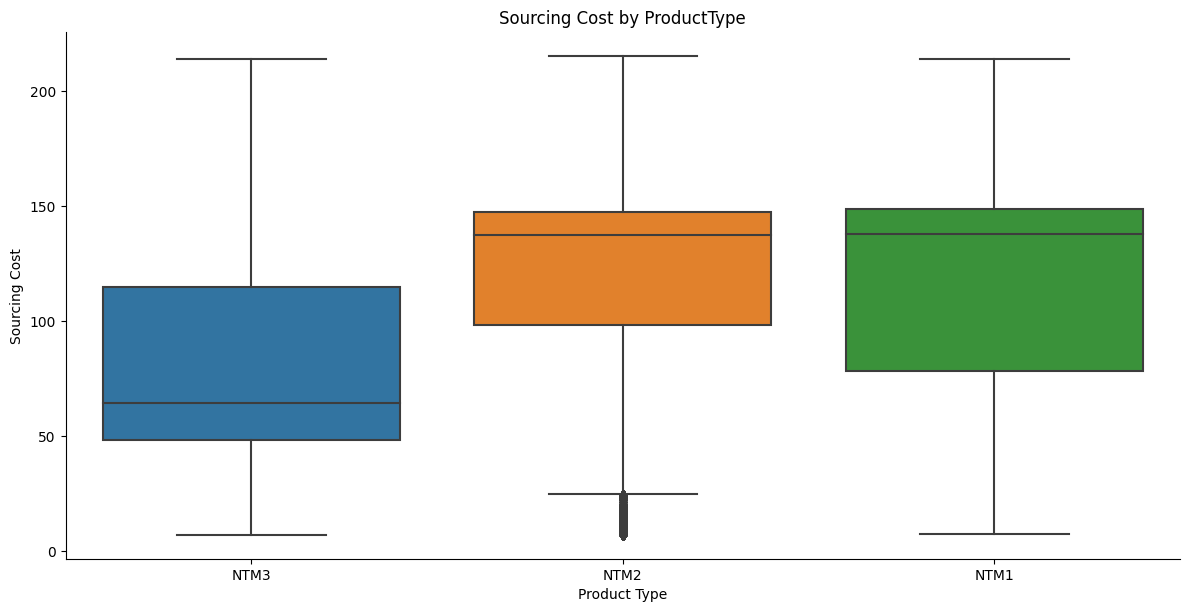

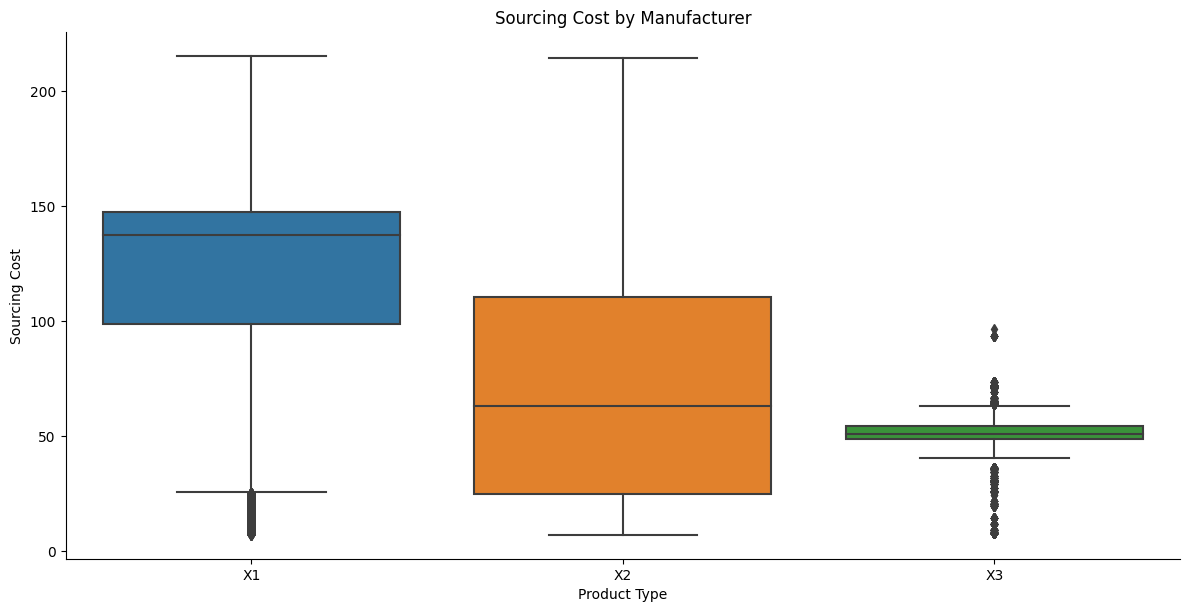

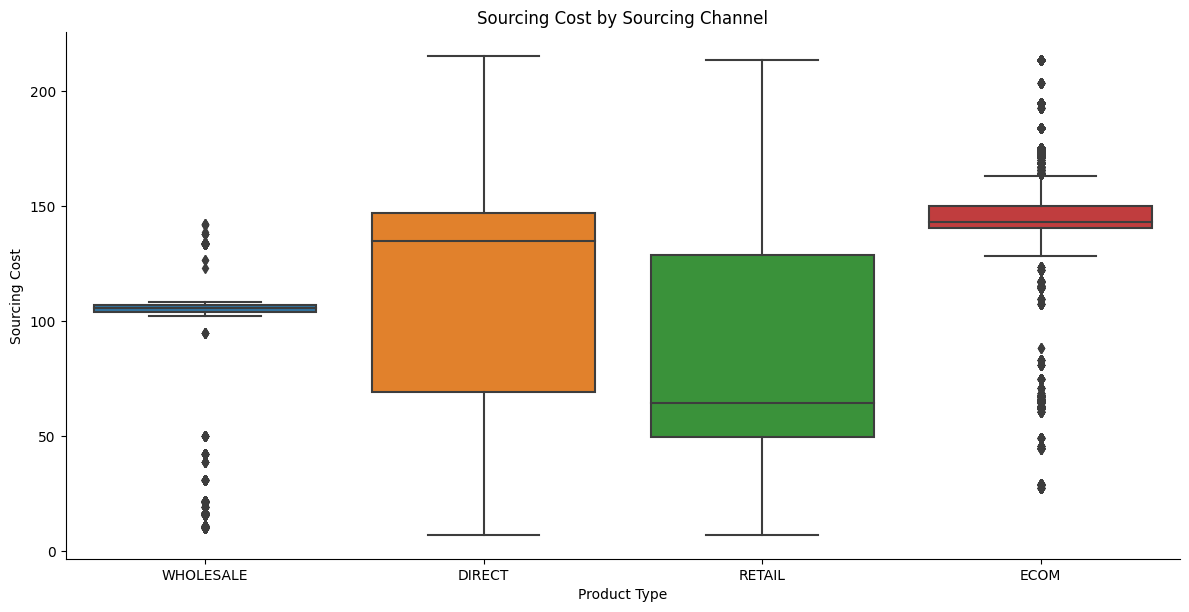

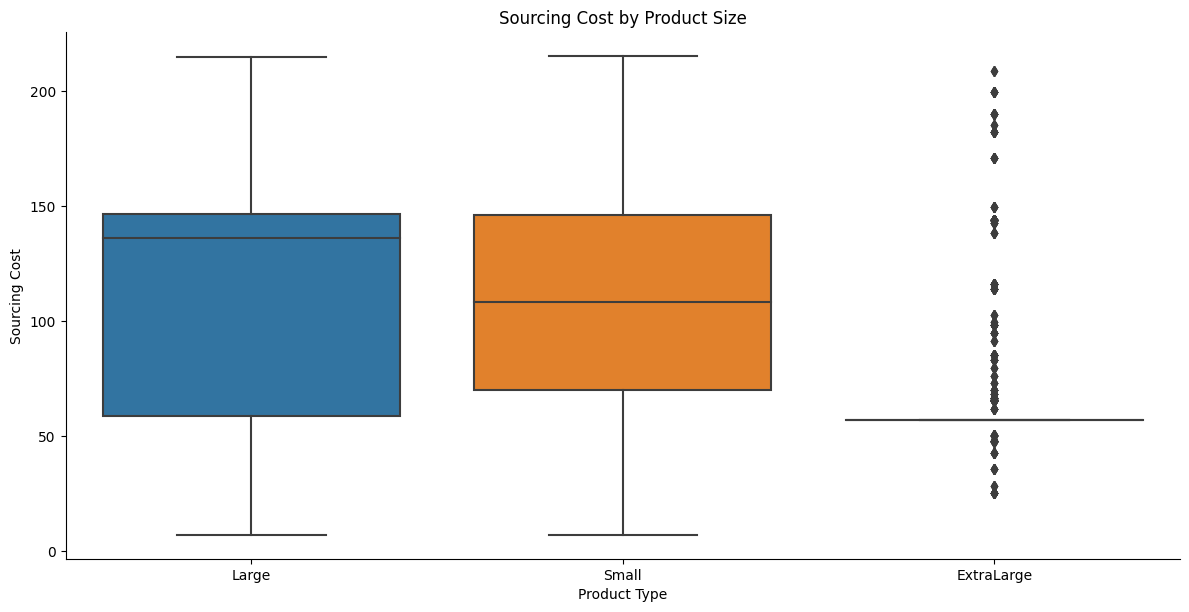

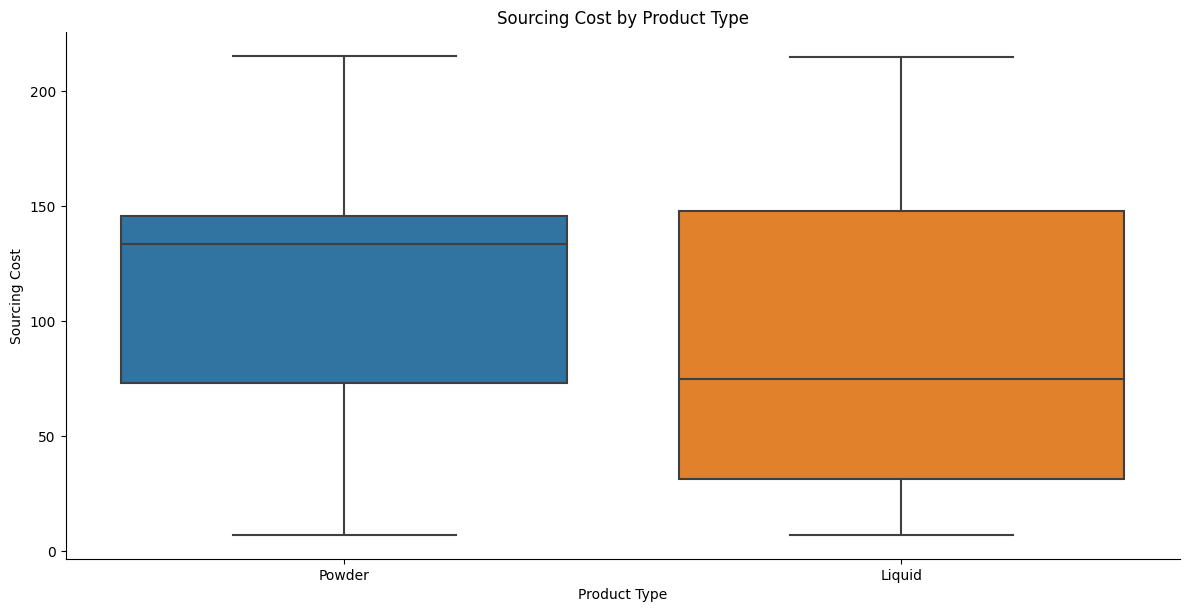

In [120]:
for column in categorical_columns:
    sns.catplot(x=column, y="Sourcing Cost", kind="box", data=train_df, aspect=2, height=6)

    # You can add additional customization if needed
    plt.title(f'Sourcing Cost by {column}')
    plt.xlabel('Product Type')
    plt.ylabel('Sourcing Cost')
    plt.show()

## Encoding the variables

In [124]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [125]:
train_df.head()

,ProductType,Manufacturer,Sourcing Channel,Product Size,Product Type,Sourcing Cost
0,2,0,3,1,1,10.158
1,1,0,0,1,1,134.281
2,2,1,0,1,1,12.456
3,2,0,3,2,1,107.220
4,1,0,0,1,0,197.763


## Plotting the correlation matrix

In [126]:
correlation_matrix = train_df.corr()

# Create a heatmap using Plotly
heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Viridis',
))

# Update layout
heatmap.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
)

# Show the heatmap
heatmap.show()

## Key takeaways from Preprocessing and EDA

#### * The dataset consists of approx. 5.5 lakh rows, out of which 10%, .i.e. approx. 55k rows are removed as either outliers or either as negative or zero values.

#### * The sourcing cost of products mainly varies from the range of 100 to 200.

#### * The ProductType 'NTM2' hs majority stake in its category, with approx. 2.5 lakh rows. 

#### * The Manufacturer 'X1' has the largest number of manufacturing with more than 4 lakh rows. Also it is the highest contributor to sourcing cost with mean of 122.57 and median of 137.67.

#### * There are 45 area codes out of which codes A28, A7, A3, A11, A8 have 30% of the orders.

#### * Sourcing channels are dominated by 'DIRECT' sources with more than 4.5 lakh rows. However, 'ECOM', which has less than 60k rows has the highest contributionto sourcing cost with mean of 144.13 and median of 143.13.

#### * Majority of the products are of size 'Large' with 3.25 lakh rows with mean of sourcing cost of 111.67 and median of 136.02.

#### * Almost 5 lakh rows are of the category 'Powder' which have a mean of 133.63 and median of 113.26.

#### * The first 4 months, i.e. July to October, had seen a lesser number of orders, ranging from 40k to 45k, while the rest of the months, i.e. November to May, saw a minimum of 50K orders.


## Train Test Split the dataset

In [71]:
X = train_df[['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size','Product Type']]
y = train_df['Sourcing Cost']

In [72]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
print("Training Rows: ",X_train.shape[0])
print("Val Rows: ", X_val.shape[0])

Training Rows:  356785
Val Rows:  152908


## Applying Linear Regreesion

In [74]:
#lIntializing linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate R2 score
r2 = r2_score(y_val, y_pred_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print R2 score and RMSE
print("R2 Score (Linear Regression):", r2)
print("RMSE (Linear Regression):", rmse)

R2 Score (Linear Regression): 0.3017259315475892
RMSE (Linear Regression): 41.341043329583606


## Applying Rigde Regression

In [75]:
# Regularization strength
alpha = 0.5 

# Initializing Ridge Regression model
model = Ridge(alpha=alpha)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate R2 score
r2 = r2_score(y_val, y_pred_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print R2 score and RMSE
print("R2 Score (Ridge Regression):", r2)
print("RMSE (Ridge Regression):", rmse)

R2 Score (Ridge Regression): 0.3017259219262597
RMSE (Ridge Regression): 41.34104361439713


## Applying for Lasso Regression Model

In [76]:
# Regularization strength
alpha = 0.5  

# Initialize Lasso Regression model
model = Lasso(alpha=alpha)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate R2 score
r2 = r2_score(y_val, y_pred_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print R2 score and RMSE
print("R2 Score (Lasso Regression):", r2)
print("RMSE (Lasso Regression):", rmse)

R2 Score (Lasso Regression): 0.29882711708545673
RMSE (Lasso Regression): 41.426766043095526


## Applying Elastic Net Regressor

In [77]:
# Regularization strength
alpha = 0.5  

# Mix ratio between L1 and L2 penalties
l1_ratio = 0.5  

# Initialize Elastic Net Regression model
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate R2 score
r2 = r2_score(y_val, y_pred_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print R2 score and RMSE
print("R2 Score (Elastic Net Regression):", r2)
print("RMSE (Elastic Net Regression):", rmse)

R2 Score (Elastic Net Regression): 0.2090573613363068
RMSE (Elastic Net Regression): 43.99881398100733


## Applying Random Forest Regressor

In [78]:
# Initialize Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate R2 score
r2 = r2_score(y_val, y_pred_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print R2 score and RMSE
print("R2 Score (Random Forest Regression):", r2)
print("RMSE (Random Forest Regression):", rmse)

R2 Score (Random Forest Regression): 0.5770944609325059
RMSE (Random Forest Regression): 32.17289654378314


## Applying Gradient Boosting Regressor

In [79]:
# Initialize Gradient Boosting Regression model
model = GradientBoostingRegressor( random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate R2 score
r2 = r2_score(y_val, y_pred_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print R2 score and RMSE
print("R2 Score (Gradient Boosting Regression):", r2)
print("RMSE (Gradient Boosting Regression):", rmse)

R2 Score (Gradient Boosting Regression): 0.5616720566647613
RMSE (Gradient Boosting Regression): 32.754279798128856


## Highest Performing Models: Random Forest Regressor and Gradient Boosting Regressor

## Hyperparameter Tunning of Random Forest Regressor

### After various trials and combinations, here are the best hyperparameters of the model along with k-fold cross validation:

In [80]:
# HyperParameters
n_estimators = 100 # Number of trees in the forest
max_depth = 5 # Maximum depth of the trees
min_samples_split=20#Mininmum number of samples to split a node
min_samples_leaf=20#Minimum samples leaf
max_features=5#Max features
bootstrap=False#Bootstrap

# Initialize Random Forest Regression model
model = RandomForestRegressor(n_estimators=n_estimators, 
                              max_depth=max_depth, 
                              min_samples_split=min_samples_split,
                              min_samples_leaf=min_samples_leaf,
                              max_features=max_features,
                              bootstrap=bootstrap,
                              random_state=42)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store RMSE and R2 scores for each fold
rmse_scores = []
r2_scores = []

# Perform k-fold cross-validation
for fold, (train_indices, val_indices) in enumerate(k_fold.split(X), start=1):
    X_train, X_val = X.iloc[train_indices], X.iloc[val_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred_val = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    rmse_scores.append(rmse)
    
    # Calculate R2 score
    r2 = r2_score(y_val, y_pred_val)
    r2_scores.append(r2)
    
    # Print RMSE and R2 score for the fold
    print(f"Fold {fold}: RMSE = {rmse}, R2 Score = {r2}")

# Calculate average RMSE and R2 score across all folds
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)


print(f"\nAverage R2 Score across all folds: {avg_r2}")
print(f"Average RMSE across all folds: {avg_rmse}")

Fold 1: RMSE = 32.2717380992814, R2 Score = 0.5748589837917963
Fold 2: RMSE = 32.45571801449147, R2 Score = 0.5694886668442201
Fold 3: RMSE = 32.53651193474716, R2 Score = 0.5702982803778587
Fold 4: RMSE = 32.205708415832326, R2 Score = 0.5770094650460069
Fold 5: RMSE = 32.48747832974757, R2 Score = 0.5703645945367875

Average R2 Score across all folds: 0.572403998119334
Average RMSE across all folds: 32.39143095881998


## Hyperparameter Tunning of Gradient Boosting Regressor

### After various trials and combinations, here are the best hyperparameters of the model:

In [81]:
#hyperparameters
n_estimators = 10000# Number of boosting stages
learning_rate = 3e-4  # Learning rate
max_depth = 5  # Maximum depth of the individual trees

# Initialize Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=n_estimators, 
                                  learning_rate=learning_rate, 
                                  max_depth=max_depth, 
                                  random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate R2 score
r2 = r2_score(y_val, y_pred_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print R2 score and RMSE
print("R2 Score (Gradient Boosting Regression):", r2)
print("RMSE (Gradient Boosting Regression):", rmse)

R2 Score (Gradient Boosting Regression): 0.5711035461301901
RMSE (Gradient Boosting Regression): 32.45952788033059


## Applying PCA to dataset
#### Reason: PCA in regression problems can help in simplifying the data representation, improving model interpretability, and potentially enhancing the performance of your regression models by capturing the most important aspects of the data.

In [82]:
# Initialize PCA model
pca = PCA(n_components=None)  

# Fit PCA model on training data
pca.fit(X_train)

# Transform training and testing data using the fitted PCA model
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

## Hyperparameter Tunning of Random Forest Regressor with PCA Applied Dataset

In [83]:
# HyperParameters
n_estimators = 100 # Number of trees in the forest
max_depth = 5 # Maximum depth of the trees
min_samples_split=20#Mininmum number of samples to split a node
min_samples_leaf=20#Minimum samples leaf
max_features=5#Max features
bootstrap=False#Bootstrap

# Initialize Random Forest Regression model
model = RandomForestRegressor(n_estimators=n_estimators, 
                              max_depth=max_depth, 
                              min_samples_split=min_samples_split,
                              min_samples_leaf=min_samples_leaf,
                              max_features=max_features,
                              bootstrap=bootstrap,
                              random_state=42)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store RMSE and R2 scores for each fold
rmse_scores = []
r2_scores = []

# Perform k-fold cross-validation
for fold, (train_indices, val_indices) in enumerate(k_fold.split(X), start=1):
    X_train, X_val = X.iloc[train_indices], X.iloc[val_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred_val = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    rmse_scores.append(rmse)
    
    # Calculate R2 score
    r2 = r2_score(y_val, y_pred_val)
    r2_scores.append(r2)
    
    # Print RMSE and R2 score for the fold
    print(f"Fold {fold}: RMSE = {rmse}, R2 Score = {r2}")

# Calculate average RMSE and R2 score across all folds
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)


print(f"\nAverage R2 Score across all folds: {avg_r2}")
print(f"Average RMSE across all folds: {avg_rmse}")

Fold 1: RMSE = 32.2717380992814, R2 Score = 0.5748589837917963
Fold 2: RMSE = 32.45571801449147, R2 Score = 0.5694886668442201
Fold 3: RMSE = 32.53651193474716, R2 Score = 0.5702982803778587
Fold 4: RMSE = 32.205708415832326, R2 Score = 0.5770094650460069
Fold 5: RMSE = 32.48747832974757, R2 Score = 0.5703645945367875

Average R2 Score across all folds: 0.572403998119334
Average RMSE across all folds: 32.39143095881998


## Hyperparameter Tunning of Gradient Boosting Regressor with PCA Applied Dataset

In [84]:
#hyperparameters
n_estimators = 10000# Number of boosting stages
learning_rate = 5e-4  # Learning rate
max_depth = 5  # Maximum depth of the individual trees

# Initialize Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=n_estimators, 
                                  learning_rate=learning_rate, 
                                  max_depth=max_depth, 
                                  random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate R2 score
r2 = r2_score(y_val, y_pred_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print R2 score and RMSE
print("R2 Score (Gradient Boosting Regression):", r2)
print("RMSE (Gradient Boosting Regression):", rmse)

R2 Score (Gradient Boosting Regression): 0.5735489335571773
RMSE (Gradient Boosting Regression): 32.36686030675655


## Thus Gradient Boosting Regressor is the best performing model

# Predicting on Test Data set

## Preprocessing Steps

In [85]:
# dropping columns
columns_to_drop = ['Area Code', 'Month of Sourcing']
test_df.drop(columns=columns_to_drop, inplace=True)

#label encoding categorical columns
categorical_columns = test_df.select_dtypes(include=['object', 'category','datetime64']).columns.tolist()
for column in categorical_columns:
    test_df[column] = label_encoder.fit_transform(test_df[column])

In [87]:
X_test = test_df[['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size','Product Type']]
y_test= test_df['Sourcing Cost']

# Make predictions on the validation set
y_pred_test = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print R2 score and RMSE
print("R2 Score (Gradient Bossting Regression):", r2)
print("RMSE (Gradient Bossting Regression):", rmse)

R2 Score (Gradient Bossting Regression): 0.3955230382568832
RMSE (Gradient Bossting Regression): 40.49593392068226


## Conclusion and Result

#### Out of all the models and approaches applied, PCA applied dataset + fine-tunned Gradient Boosting Regressor gave teh best results, with t=least difference between validation and test results

#### Validation Results:
* R2 Score: 0.5735
* RMSE: 32.3668

#### Test Results:
* R2 Score: 0.3955
* RMSE: 40.4959

## Saving the model as pickle file

In [129]:
joblib.dump(model, 'Gradient_Boosting_Regressor_Model.pkl')

['Gradient_Boosting_Regressor_Model.pkl']